In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from env import host, user, password
from pydataset import data

def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

In [2]:
#1. For each of the following questions, formulate a null and alternative hypothesis
# (be as specific as you can be), then give an example of what a true positive, true negative, 
# type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way.
# It is your job to reword these as more precise questions that could be tested.

# - Has the network latency gone up since we switched internet service providers?
null_hypo = 'The network latency has not changed after switching ISP'
alt_hypo = 'The network latency has increased after switching ISP'
true_pos = 'I believe the network latency has increased and in reality it has increased'
true_neg = 'I believe the network lag has not increased and after test it has not'
type_1 = 'I hypothesized that the network lag has increased but in reality it has not'
type_2 = 'I hypothesized that the network lag has not increased but in reality it has'

# - Is the website redesign any good?
null_hypo = 'The website redesign has not improved' #be more specific
alt_hypo = 'The website redesign has improved'
true_pos = 'The website redesign has improved and everyone likes it'
true_neg = 'The website redesign has not improved and everyone hates it'
type_1 = 'I hypothesized that the website redesign has improved but everyone hates it'
type_2 = 'I hypothesized that the website redesign has not improved but everyone likes it'

# - Is our television ad driving more sales?
null_hypo = 'The tv ad has no impact on sales'
alt_hypo = 'The tv ad has an impact on sales'
true_pos = 'I believe the tv ad has an impact on sales and sales are up'
true_neg = 'I believe the tv ad has no impact on sales and sales are flat'
type_1 = 'I hypothesized that the tv ad has an impact on sales but sales are flat'
type_2 = 'I hypothesized that the tv ad has no impact on sales but sales are up'

In [3]:
#2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its 
# two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

null_hypo = 'The average time it takes to sell a home is not different for both offices'
alt_hypo = 'The average time to sell is different between both offices'
confidence_level = 0.95
a = 1 - confidence_level 

sample1 = 40
mean1 = 90
std1 = 15
sample2 = 50
mean2 = 100
std2 = 20

In [4]:
t,p = stats.ttest_ind_from_stats(mean1,std1,sample1,mean2,std2,sample2)
t,p

(-2.6252287036468456, 0.01020985244923939)

In [5]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that they are the same
We move forward w/ the alternative hypothesis


In [6]:
null_hypo = 'The average time it takes to sell a home is not different for both offices'
alt_hypo_less_than = 'The average time to sell for office A is LESS than office B'
confidence_level = 0.95
a = 1 - confidence_level 
t,p = stats.ttest_ind_from_stats(mean1,std1,sample1,mean2,std2,sample2)
t,p

(-2.6252287036468456, 0.01020985244923939)

In [7]:
if (p/2) < a and t < 0:
    print(f"We reject the null hypothesis that {null_hypo}")
    print(f"We move foward with the understanding that {alt_hypo_less_than}")
else:
    print("We fail to reject the null hypothesis")
    print("There is insufficient evidence to support the claim")
    

We reject the null hypothesis that The average time it takes to sell a home is not different for both offices
We move foward with the understanding that The average time to sell for office A is LESS than office B


In [8]:
# - Load the mpg dataset and use it to answer the following questions:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
# - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
mpg['average_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.average_mpg

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: average_mpg, Length: 234, dtype: float64

In [10]:
cars_1999 = mpg[mpg.year == 1999]
cars_2008 = mpg[mpg.year == 2008]
null_hypo = 'There is no difference in average mpg between cars from 1999 and 2008'
alt_hypo = 'There is a difference in average mpg between cars from 1999 and 2008'
confidence_level = 0.95
a = 1 - confidence_level 
t,p = stats.ttest_ind(cars_1999.average_mpg, cars_2008.average_mpg)
t,p

(0.21960177245940962, 0.8263744040323578)

In [11]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")
    

We fail to reject the null hypothesis


In [12]:
cars_1999.average_mpg.mean(), cars_2008.average_mpg.mean()

(20.22222222222222, 20.076923076923077)

In [13]:
# - Are compact cars more fuel-efficient than the average car?
null_hypo = 'Average mpg is not greater between compact cars and all cars'
alt_hypo = 'Average mpg IS greater between compact cars and all cars'
compact = mpg[mpg['class'] == 'compact']
t,p = stats.ttest_1samp(compact.average_mpg, mpg.average_mpg.mean())
t,p

(7.896888573132535, 4.1985637943171336e-10)

In [14]:
if (p/2) < a and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    

Reject the null hypothesis


In [15]:
compact.average_mpg.mean(), mpg.average_mpg.mean()

(24.21276595744681, 20.14957264957265)

In [16]:
# - Do manual cars get better gas mileage than automatic cars?
manual = mpg[mpg.trans.str.contains('man')]
manual.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


In [17]:
auto = mpg[mpg.trans.str.contains('auto')]
auto.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5


In [18]:
null_hypo = 'Average mpg is not greater for manual cars than auto cars'
alt_hypo = 'Average mpg IS greater for manual cars and auto cars'
t,p = stats.ttest_ind(manual.average_mpg,auto.average_mpg)
t,p

(4.593437735750014, 7.154374401145683e-06)

In [19]:
if (p/2) < a and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    

Reject the null hypothesis


In [20]:
manual.average_mpg.mean(),auto.average_mpg.mean()

(22.227272727272727, 19.130573248407643)

In [38]:
telco = pd.read_csv('Cust_Churn_Telco.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
non_na_telco = telco[telco.TotalCharges.isna() == False]

In [67]:
telco[telco.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [25]:
#3. Correlation
#3-1. Use the telco_churn data. Does tenure correlate with monthly charges? 
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)
r, p
# weak correlation

(0.24789985628615002, 4.0940449915016345e-99)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

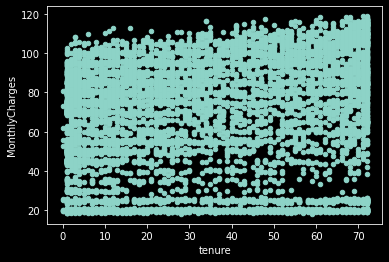

In [26]:
telco.plot.scatter('tenure','MonthlyCharges')

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

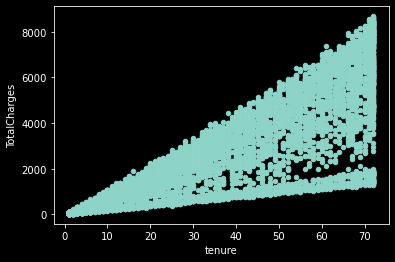

In [57]:
telco.plot.scatter('tenure','TotalCharges')

In [64]:
#Total charges? 
r, p = stats.pearsonr(non_na_telco.tenure, non_na_telco.TotalCharges)
r, p

(0.825880460933202, 0.0)

In [66]:
# What happens if you control for phone and internet service?
non_na_telco.groupby('InternetService').customerID.count()

InternetService
DSL            2416
Fiber optic    3096
No             1520
Name: customerID, dtype: int64

In [68]:
DSL = non_na_telco[non_na_telco.InternetService == 'DSL']
DSL.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [69]:
Fiber = non_na_telco[non_na_telco.InternetService == 'Fiber optic']
Fiber.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No


In [70]:
no_internet = non_na_telco[non_na_telco.InternetService == 'No']
no_internet.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


In [71]:
r, p = stats.pearsonr(DSL.tenure, DSL.TotalCharges)
r, p

(0.9411848215629784, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

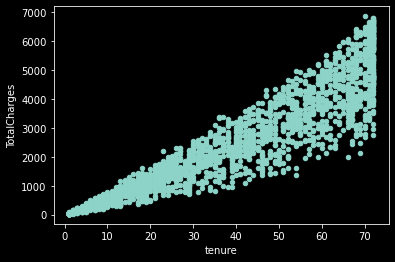

In [72]:
DSL.plot.scatter('tenure','TotalCharges')

In [73]:
r, p = stats.pearsonr(Fiber.tenure, Fiber.TotalCharges)
r, p

(0.9853093528070603, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

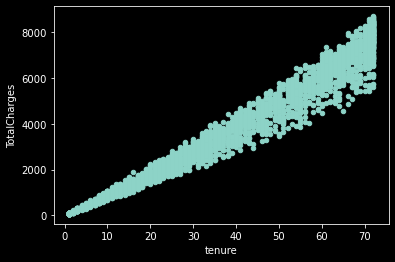

In [75]:
Fiber.plot.scatter('tenure','TotalCharges')

In [74]:
r, p = stats.pearsonr(no_internet.tenure, no_internet.TotalCharges)
r, p

(0.9814648859044286, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

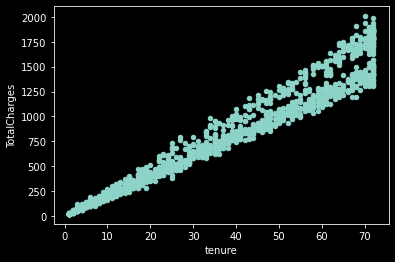

In [76]:
no_internet.plot.scatter('tenure','TotalCharges')

In [138]:
#3-2. Use the employees database.
db = 'employees'

employees_url = get_db_url(user,host,password,db)

query = '''Select emp_no, hire_date, salary, title
from employees
join salaries using(emp_no)
join titles using (emp_no)
where salaries.to_date > now();
'''

employees_df = pd.read_sql(query,employees_url)
employees_df.head()

,emp_no,hire_date,salary,title
0,10001,1986-06-26,88958,Senior Engineer
1,10002,1985-11-21,72527,Staff
2,10003,1986-08-28,43311,Senior Engineer
3,10004,1986-12-01,74057,Engineer
4,10004,1986-12-01,74057,Senior Engineer


In [139]:
employees_df.to_csv('employee_correlation.csv')
employee_corr_df = pd.read_csv('employee_correlation.csv')


In [140]:
employee_corr_df= employee_corr_df.iloc[0:,1:]
employee_corr_df.head()

,emp_no,hire_date,salary,title
0,10001,1986-06-26,88958,Senior Engineer
1,10002,1985-11-21,72527,Staff
2,10003,1986-08-28,43311,Senior Engineer
3,10004,1986-12-01,74057,Engineer
4,10004,1986-12-01,74057,Senior Engineer


In [141]:
employee_corr_df['yearly_tenure'] = 2021 - employee_corr_df.hire_date.str.slice(0,4).astype(int)
employee_corr_df.head()

,emp_no,hire_date,salary,title,yearly_tenure
0,10001,1986-06-26,88958,Senior Engineer,35
1,10002,1985-11-21,72527,Staff,36
2,10003,1986-08-28,43311,Senior Engineer,35
3,10004,1986-12-01,74057,Engineer,35
4,10004,1986-12-01,74057,Senior Engineer,35


In [142]:
# - Is there a relationship between how long an employee has been with the company and their salary?
r,p = stats.pearsonr(employee_corr_df.yearly_tenure, employee_corr_df.salary)
r,p

(0.305756580400543, 0.0)

<AxesSubplot:xlabel='yearly_tenure', ylabel='salary'>

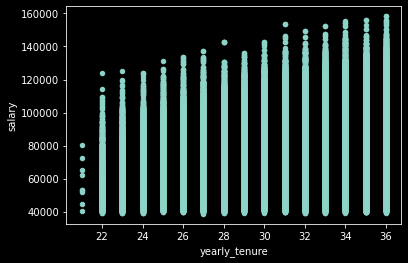

In [143]:
employee_corr_df.plot.scatter('yearly_tenure','salary')

In [153]:
title_count = employee_corr_df.groupby('emp_no')['title'].nunique()
type(title_count)

pandas.core.series.Series

In [147]:
employee_corr_df.columns.tolist()

['emp_no', 'hire_date', 'salary', 'title', 'yearly_tenure']

In [152]:
query_grouped = '''Select emp_no, hire_date, salary, title
from employees
join salaries using(emp_no)
join titles using (emp_no)
where salaries.to_date > now()
and titles.to_date > now();
'''
employee_corr_grouped = pd.read_sql(query_grouped,employees_url)
employee_corr_grouped.to_csv('employee_grouped.csv')
employee_corr_grouped = pd.read_csv('employee_grouped.csv')

In [155]:
# - Is there a relationship between how long an employee has been with the company and the number of 
# titles they have had?
employee_corr_grouped['yearly_tenure'] = 2021 - employee_corr_grouped.hire_date.str.slice(0,4).astype(int)
r,p = stats.pearsonr(employee_corr_grouped.yearly_tenure, title_count)
r,p


(0.286355435331731, 0.0)

In [159]:
#3-3.Use the sleepstudy data. Is there a relationship between days and reaction time?
sleep  = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [160]:
r,p = stats.pearsonr(sleep.Days,sleep.Reaction)
r,p

(0.5352302262650253, 9.894096322214812e-15)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

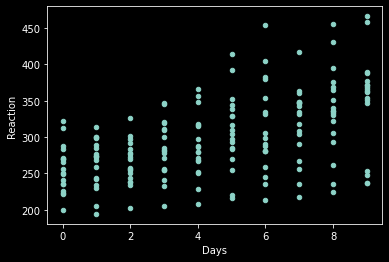

In [161]:
sleep.plot.scatter('Days','Reaction')

In [166]:
#4.1 Use the following contingency table to help answer the question of whether using a
# macbook and being a codeup student are independent of each other.
'''            Codeup Student	Not Codeup Student
Uses a Macbook      	49	20
Doesn't Use A Macbook	1	30
'''
d = {'Codeup Student': [49, 1], 'Not Codeup Studen': [20, 30]}
df = pd.DataFrame(data=d)
df


,Codeup Student,Not Codeup Studen
0,49,20
1,1,30


In [173]:
a = 0.05

In [168]:
null_hypo = 'Using a macbook and being a codeup student are independent'
alt_hypo = 'Using a macbook and being a codeup student are dependent'
chi2, p, degf, expected = stats.chi2_contingency(df)
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [175]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [192]:
#4.2 Choose another 2 categorical variables from the mpg dataset and perform a chi2
# contingency table test with them. Be sure to state your null and alternative hypotheses.
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  average_mpg   234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [186]:
observed = pd.crosstab(mpg['class'],mpg.drv)
observed

drv,4,f,r
class,,,
2seater,0,0,5
compact,12,35,0
midsize,3,38,0
minivan,0,11,0
pickup,33,0,0
subcompact,4,22,9
suv,51,0,11


In [187]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p,degf, expected

(221.60114385352526,
 1.104881117447524e-40,
 12,
 array([[ 2.2008547 ,  2.26495726,  0.53418803],
        [20.68803419, 21.29059829,  5.02136752],
        [18.04700855, 18.57264957,  4.38034188],
        [ 4.84188034,  4.98290598,  1.17521368],
        [14.52564103, 14.94871795,  3.52564103],
        [15.40598291, 15.85470085,  3.73931624],
        [27.29059829, 28.08547009,  6.62393162]]))

In [193]:
observed = pd.crosstab(mpg.cyl,mpg.fl)
observed

fl,c,d,e,p,r
cyl,,,,,
4,1,3,0,22,55
5,0,0,0,0,4
6,0,1,1,17,60
8,0,1,7,13,49


In [194]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p,degf, expected

(19.245913870470833,
 0.08276414261795349,
 12,
 array([[3.46153846e-01, 1.73076923e+00, 2.76923077e+00, 1.80000000e+01,
         5.81538462e+01],
        [1.70940171e-02, 8.54700855e-02, 1.36752137e-01, 8.88888889e-01,
         2.87179487e+00],
        [3.37606838e-01, 1.68803419e+00, 2.70085470e+00, 1.75555556e+01,
         5.67179487e+01],
        [2.99145299e-01, 1.49572650e+00, 2.39316239e+00, 1.55555556e+01,
         5.02564103e+01]]))

In [195]:
#4.3 Use the data from the employees database to answer these questions:
dept_query = '''select * 
from employees
join dept_emp using(emp_no)
join departments using (dept_no)
where dept_emp.to_date > now();
'''
dept = pd.read_sql(dept_query,employees_url)
dept.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service


In [196]:
# - Is an employee's gender independent of whether an employee works in sales or marketing? 
# (only look at current employees)
observed = pd.crosstab(dept.gender, dept.dept_name)
observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,7007,24533,5014,5147,5864,21393,5872,6181,14999
M,10562,36853,7423,7751,8978,31911,8674,9260,22702


In [202]:
observed = observed.drop(columns=['Production','Customer Service','Development','Finance','Human Resources','Quality Management','Research'])
observed 


dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [203]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p,degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [ ]:
# - Is an employee's gender independent of whether or not they are or have been a manager?